In [1]:
import hcp_utils as hcp
from nilearn import datasets, plotting, regions
import brainspace
import pandas as pd
import numpy as np
import seaborn as sns
import nibabel as nib
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/home/victoria/NeuroConn')
sys.path.append('/home/victoria/surfdist')
from austin_utils import save_gifti
from NeuroConn.preprocessing.preprocessing import FmriPreppedDataSet
from NeuroConn.gradient.gradient import get_gradients
from brainspace.utils.parcellation import map_to_labels, reduce_by_labels
from brainspace.gradient import GradientMaps
from brainspace.plotting import plot_hemispheres

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [64]:
np.where(np.where(fsLR_labels_R == 2)[0] == 31908)

(array([4579]),)

In [40]:
from surfdist import viz, load, utils, analysis

dist_Tpeak_a1_L = analysis.calc_roi_dist(surfL, cortex_L, TpeakTempL, V1L, dist_type='min')
dist_Tpeak_a1_L

80.08159326324187

In [35]:
V1dist = analysis.dist_calc(surfL, cortex_L, V1L)

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

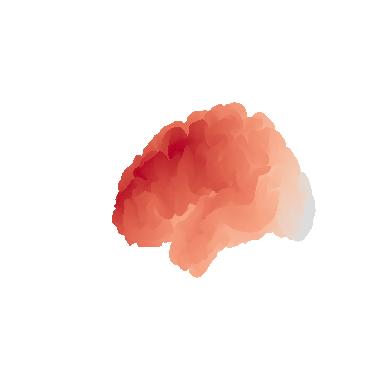

In [37]:
viz.viz(nodesL, trianglesL, V1dist, cmap = 'coolwarm', azim=180)

In [ ]:
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

Downloaded 3055616 of 5482474 bytes (55.7%,    0.8s remaining) ...done. (5 seconds, 0 min)
Extracting data from /home/victoria/neuromaps-data/599046a594e0e45c04e90291c2348cbe/fsLR32k.tar.gz..... done.


In [ ]:
plot_cols = {
    
}

In [2]:
distances_task = pd.read_csv("distances_task_thresh5.csv")


In [4]:
long_distances_task = pd.melt(distances_task, id_vars=['participant_id', 'FlashType', 'NrBeeps', 'correct', 'rt', 'correct_abs', 'correct_rel', 'rt_abs', 'rt_rel', 'rt_Cod', 'bl_correct'], value_vars=['Dist to A1, LH', 'Dist to A1, RH', 'Dist to V1, LH', 'Dist to V1, RH'], var_name='Dist Type', value_name='Distance')
long_distances_task = pd.melt(long_distances_task, id_vars=['participant_id', 'FlashType', 'NrBeeps', 'Dist Type', "Distance"], value_vars=[ 'correct', 'rt', 'correct_abs', 'correct_rel', 'rt_abs', 'rt_rel', 'rt_Cod', 'bl_correct'], var_name = "Performance Var", value_name = "Measure")

In [5]:
from scipy.stats import pearsonr
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'

def annotate_corr(x, y, **kwargs):
    r, pval = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}\np = {pval:.2f}", xy=(.1, .9), xycoords=ax.transAxes)

g = sns.FacetGrid(long_distances_task[long_distances_task["FlashType"] == 1], col="Dist Type", row = 'Performance Var', hue="NrBeeps", height=4, aspect=1, margin_titles=True, sharex = False, sharey = False)
g.map(sns.regplot, "Measure", "Distance")#.add_legend().map(annotate_corr, "Measure", "Distance")
g.add_legend()
plt.savefig("Flash1_scatter.svg", dpi = 300, format = 'svg')

,participant_id,FlashType,NrBeeps,correct,rt,correct_abs,correct_rel,rt_abs,rt_rel,rt_Cod,bl_correct,Dist Type,Distance
0,51902,1,1,1.000000,0.628741,0.000000,0.000000,0.053981,0.079067,0.463472,1.000000,"Dist to A1, LH",27.511599
1,51902,1,2,0.964286,0.811686,-0.035714,-0.035679,-0.128965,-0.188898,-0.632190,1.000000,"Dist to A1, LH",27.511599
2,51902,2,1,0.586207,0.818781,0.052874,0.113058,0.062051,0.070446,0.217052,0.533333,"Dist to A1, LH",27.511599
3,51902,2,2,0.033333,0.819941,-0.500000,-0.935745,0.060892,0.069130,0.209463,0.533333,"Dist to A1, LH",27.511599
4,51902,3,1,0.033333,0.708784,0.000000,0.000000,-0.050041,-0.075964,-0.344501,0.033333,"Dist to A1, LH",27.511599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,42017,2,2,0.033333,0.833385,-0.863218,-0.961748,-0.085185,-0.113853,-0.313300,0.896552,"Dist to V1, RH",85.459626
8252,42017,3,1,0.133333,0.772891,0.066667,0.071352,-0.007251,-0.009471,-0.030168,0.066667,"Dist to V1, RH",85.459626
8253,42017,3,2,0.033333,0.916801,-0.033333,-0.492611,-0.151160,-0.197430,-0.304682,0.066667,"Dist to V1, RH",85.459626
8254,42017,4,1,0.866667,0.795912,-0.033333,-0.036996,0.066045,0.076622,0.197237,0.900000,"Dist to V1, RH",85.459626
